In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with = engine)
# reflect the tables


In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
#session.query(Measurement.date).order_by(Measurement.date).first()

recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

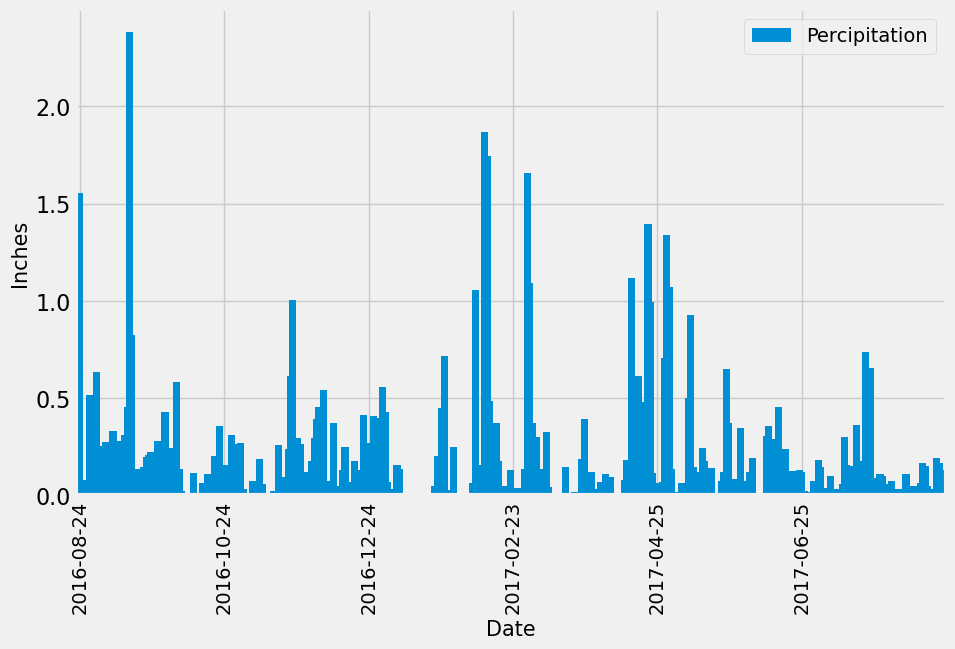

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_12_months = dt.datetime.strptime(recent_date,'%Y-%m-%d') - dt.timedelta(days=365)
last_12_months

# Perform a query to retrieve the data and precipitation scores
prcp_scores = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(Measurement.date >= last_12_months).\
    group_by(Measurement.date).all()
prcp_scores

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_scores, columns = ['Date','Percipitation'])
prcp_df.set_index('Date',inplace=True)
prcp_df.head()

# Sort the dataframe by date

prcp_df = pd.DataFrame(prcp_scores, columns = ['Date','Percipitation'])
prcp_df.set_index('Date',inplace=True)
prcp_df.head()


# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = prcp_df.plot(kind='bar', width=3, figsize=(10,6))
plt.locator_params(axis="x",nbins=6)
prcp_plot.tick_params(axis="y",labelsize=16)
prcp_plot.grid(True)
plt.ylabel("Inches", size=15)
plt.xlabel("Date",size=15)
plt.show()

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Percipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [62]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

print (f"The Lowest, Highest, and Average Temperature for the most active station is: {station_temp}")

The Lowest, Highest, and Average Temperature for the most active station is: [(54.0, 85.0, 71.66378066378067)]


<function matplotlib.pyplot.show(close=None, block=None)>

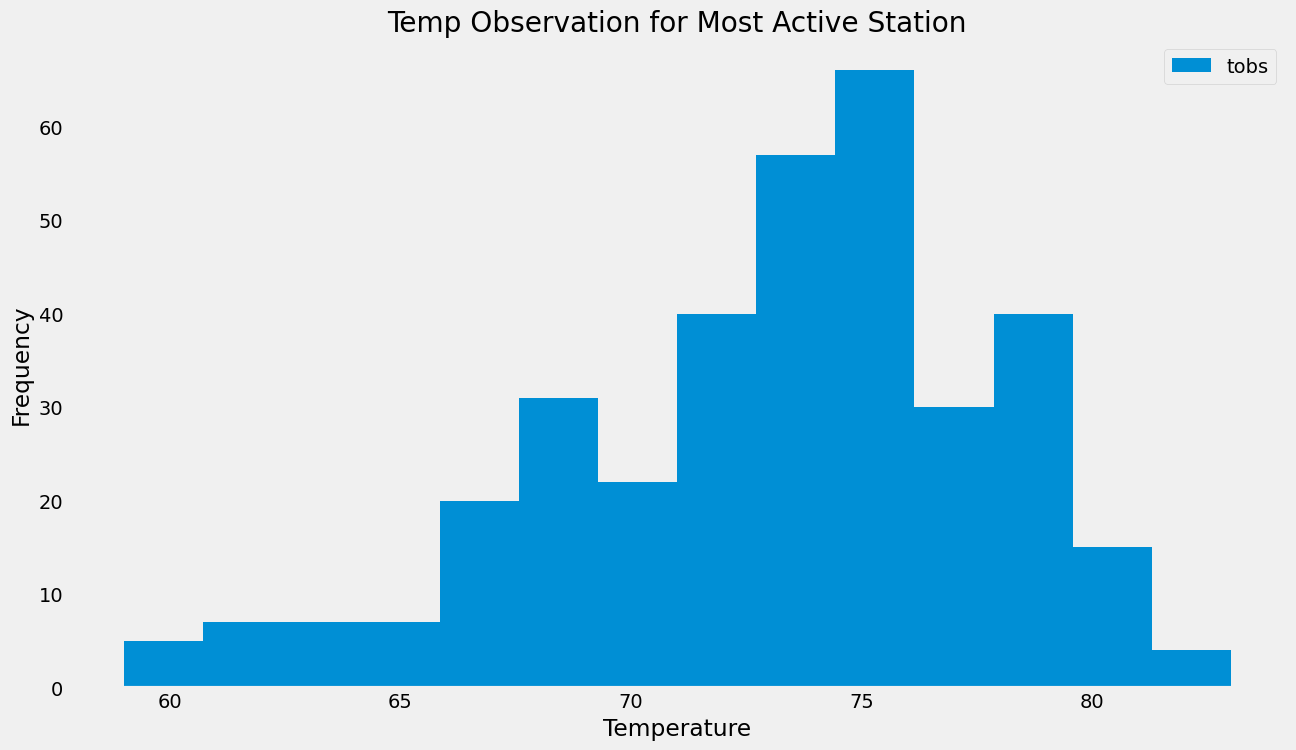

In [71]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

highest_num = most_active[0][0]
tobs = session.query(Measurement.station,Measurement.tobs).\
    filter (Measurement.station == highest_num).\
    filter(Measurement.date >= last_12_months).all()

tobs_df = pd.DataFrame(tobs)

tobs_df.head()

tobs_df.plot.hist(by='station', bins=14, figsize=(14,8))
plt.grid()
plt.title("Temp Observation for Most Active Station")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show

# Close Session

In [72]:
# Close Session
session.close()